# Comment Toxicity


In [54]:
import os 
import pandas as pd
import tensorflow as tf
import numpy as np

In [55]:

df = pd.read_csv("train.csv")

In [56]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
3,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
4,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0


In [57]:
from tensorflow.keras.layers import TextVectorization

In [58]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [59]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [60]:
MAX_FEATURES = 200000

In [61]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode = 'int')

In [62]:
vectorizer.adapt(X.values)

In [63]:
vectorizer('hi this is working good')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([171,  14,   9, 585,  98])>

In [64]:
vectorizer_text = vectorizer(X.values)

In [65]:
len(X)

159568

In [66]:
vectorizer_text

<tf.Tensor: shape=(159568, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [ 2522,    31,    36, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [67]:
dataset = tf.data.Dataset.from_tensor_slices((vectorizer_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(16000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [68]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

2024-01-30 07:44:57.741035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 07:44:57.741555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 07:44:57.844454: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an inp

In [69]:
batch_X.shape

(16, 1800)

In [70]:
batch_y.shape

(16, 6)

In [71]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [72]:
train_generator = train.as_numpy_iterator()

2024-01-30 07:44:58.624872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 07:44:58.625297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159568,1800]
	 [[{{node Placeholder/_0}}]]


In [73]:
train_generator.next()


(array([[   8,  524,  199, ...,    0,    0,    0],
        [ 124,    7,   37, ...,    0,    0,    0],
        [ 218,   19,    3, ...,    0,    0,    0],
        ...,
        [  67,  185,   10, ...,    0,    0,    0],
        [ 202, 1042, 1218, ...,    0,    0,    0],
        [ 425, 1486, 1495, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0]]))

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout,Bidirectional, Dense

In [75]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add (Dense(128, activation = 'relu'))
model.add (Dense(256, activation = 'relu'))
model.add (Dense(128, activation = 'relu'))
model.add (Dense(6, activation = 'sigmoid')) 

2024-01-30 07:44:59.077260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-30 07:44:59.078886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-30 07:44:59.079781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [76]:
model.compile(loss= 'BinaryCrossentropy', optimizer='Adam')

In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

In [78]:
history =  model.fit(train, epochs=1, validation_data=val)

2024-01-30 07:44:59.541920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-30 07:44:59.543115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-30 07:44:59.543947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6980/6981 [============================>.] - ETA: 0s - loss: 0.0625

2024-01-30 08:44:35.075341: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


6981/6981 [==============================] - ETA: 0s - loss: 0.0625

2024-01-30 08:44:36.271696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 08:44:36.272646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 08:44:36.548331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split

6981/6981 [==============================] - 3699s 530ms/step - loss: 0.0625 - val_loss: 0.0485


In [79]:
history.history

{'loss': [0.06245957314968109], 'val_loss': [0.04853491485118866]}

In [80]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

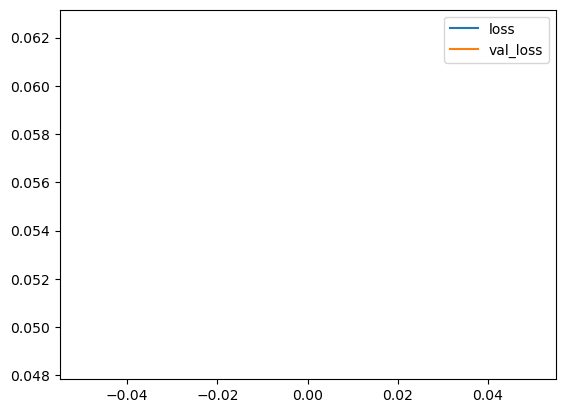

In [81]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [82]:
text = vectorizer('You freaking Suck')

In [83]:
np.expand_dims(text,0)

array([[   7, 7158,  397, ...,    0,    0,    0]])

In [84]:
model.predict(np.expand_dims(text,0))

2024-01-30 08:46:38.958820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-30 08:46:38.960077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-30 08:46:38.960872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 492ms/step


array([[0.9896218 , 0.23785692, 0.9245831 , 0.04551519, 0.82300454,
        0.1425346 ]], dtype=float32)

In [85]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [86]:
batch = test.as_numpy_iterator().next()

2024-01-30 08:46:39.965793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [159568,6]
	 [[{{node Placeholder/_1}}]]
2024-01-30 08:46:39.966170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [159568,1800]
	 [[{{node Placeholder/_0}}]]


In [87]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [90]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [ ]:
res = model.predict(np.expand_dims(text,0))

In [88]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 78ms/step


array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [91]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [102]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [103]:
for batch in test.as_numpy_iterator():
    X_true,y_true = batch
    y_pred = model.predict(X_true)

    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    pre.update_state(y_true, y_pred)
    re.update_state(y_true,y_pred)
    acc.update_state(y_true, y_pred)

1/1 [==============================] - 0s 74ms/step


In [104]:
print(f'Precision: {pre.result().numpy()},Recall:{re.result().numpy()}Accuracy:{acc.result().numpy()}')

Precision: 0.7842938899993896,Recall:0.676846981048584Accuracy:0.47241726517677307


In [111]:
model.save('toxicity.h5')

In [114]:
test_str = vectorizer("I hate you! ill get you for the shit you have done")

In [117]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [116]:
model.predict(np.expand_dims(test_str,0))

1/1 [==============================] - 0s 120ms/step


array([[0.98259026, 0.2454473 , 0.90025824, 0.05993592, 0.80067647,
        0.15936844]], dtype=float32)

In [129]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
 
    text = ''
    for idx,col in enumerate (df.columns[2:]):
        text += '{}: {}  '.format(col, results[0][idx]>0.5)
        print(" ",end=" ")
    return text

In [130]:
score_comment("i will kill you")



1/1 [==============================] - 0s 64ms/step
            

'toxic: True  severe_toxic: False  obscene: True  threat: False  insult: False  identity_hate: False  '

In [ ]:
mo